In [1]:
import functions as func

<Figure size 360x288 with 0 Axes>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import numpy as np

#### Shape do dataframe

In [3]:
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
data = pd.read_csv('../data/pd_speech_features.csv', skiprows=[0])
data.shape

(756, 755)

#### Número de cada tipo de dados

In [4]:
data.dtypes.value_counts()

float64    749
int64        6
dtype: int64

#### Verificar se há colunas com valores null

In [5]:
data.columns[data.isna().any()].tolist()

[]

In [6]:
data.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [7]:
int_columns = data.select_dtypes(include='int64').columns
int_columns

Index(['id', 'gender', 'numPulses', 'numPeriodsPulses',
       'app_entropy_shannon_10_coef', 'class'],
      dtype='object')

#### Distribuição pelos dois géneros e pelas duas classes (variáveis categoricas)

<Figure size 432x288 with 0 Axes>

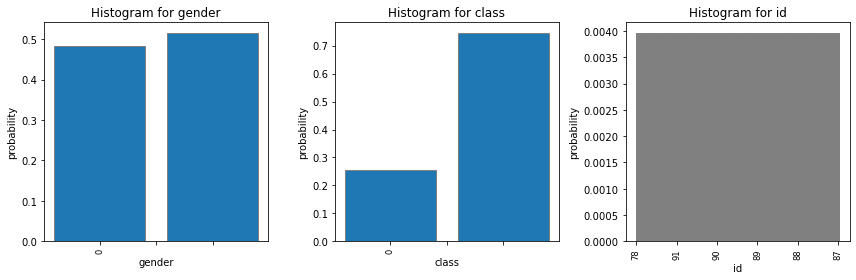

In [8]:
columns = ['gender', 'class', "id"]
rows, cols = func.choose_grid(len(columns))
cols=3
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    counts = data[columns[n]].dropna().value_counts(normalize=True)
    func.bar_chart(axs[i, j], counts.index, counts.values, 'Histogram for %s'%columns[n], columns[n], 'probability')
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

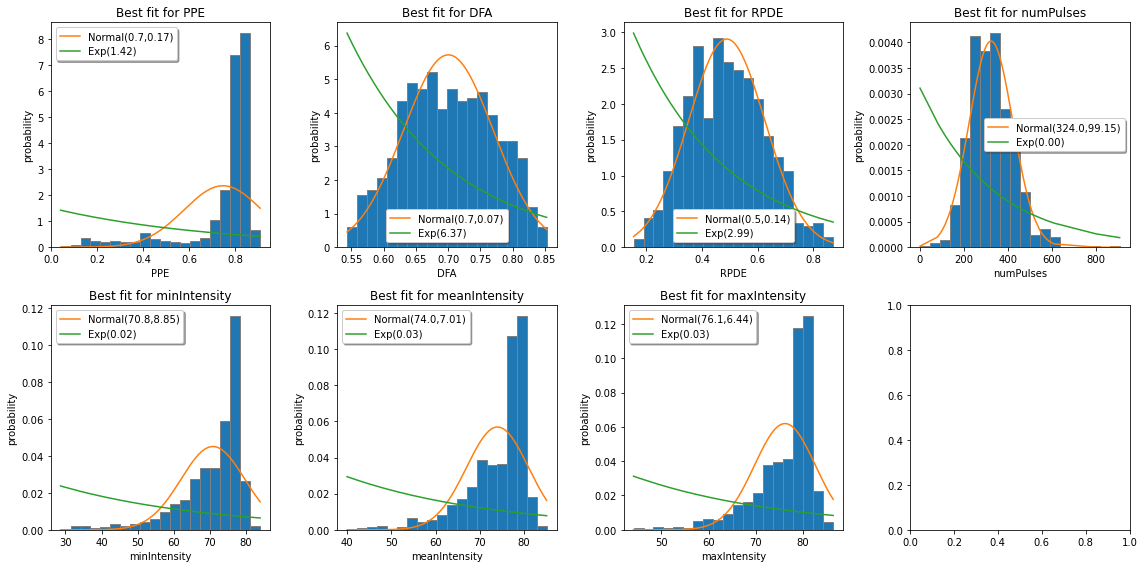

In [9]:
import scipy.stats as _stats 
def compute_known_distributions(x_values, n_bins) -> dict:
    distributions = dict()
    # Gaussian
    mean, sigma = _stats.norm.fit(x_values)
    distributions['Normal(%.1f,%.2f)'%(mean,sigma)] = _stats.norm.pdf(x_values, mean, sigma)
    # LogNorm
  #  sigma, loc, scale = _stats.lognorm.fit(x_values)
  #  distributions['LogNor(%.1f,%.2f)'%(np.log(scale),sigma)] = _stats.lognorm.pdf(x_values, sigma, loc, scale)
    # Exponential
    loc, scale = _stats.expon.fit(x_values)
    distributions['Exp(%.2f)'%(1/scale)] = _stats.expon.pdf(x_values, loc, scale)
    # SkewNorm
   # a, loc, scale = _stats.skewnorm.fit(x_values)
   # distributions['SkewNorm(%.2f)'%a] = _stats.skewnorm.pdf(x_values, a, loc, scale) 
    return distributions

def histogram_with_distributions(ax: plt.Axes, series: pd.Series, var: str):
    values = series.sort_values().values
    n, bins, patches = ax.hist(values, 20, density=True, edgecolor='grey')
    distributions = compute_known_distributions(values, bins)
    func.multiple_line_chart(ax, values, distributions, 'Best fit for %s'%var, var, 'probability')

columns = ['PPE','DFA','RPDE','numPulses','minIntensity', 'meanIntensity', 'maxIntensity']
rows, cols = func.choose_grid(len(columns)-1)
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    histogram_with_distributions(axs[i, j], data[columns[n]].dropna(), columns[n])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

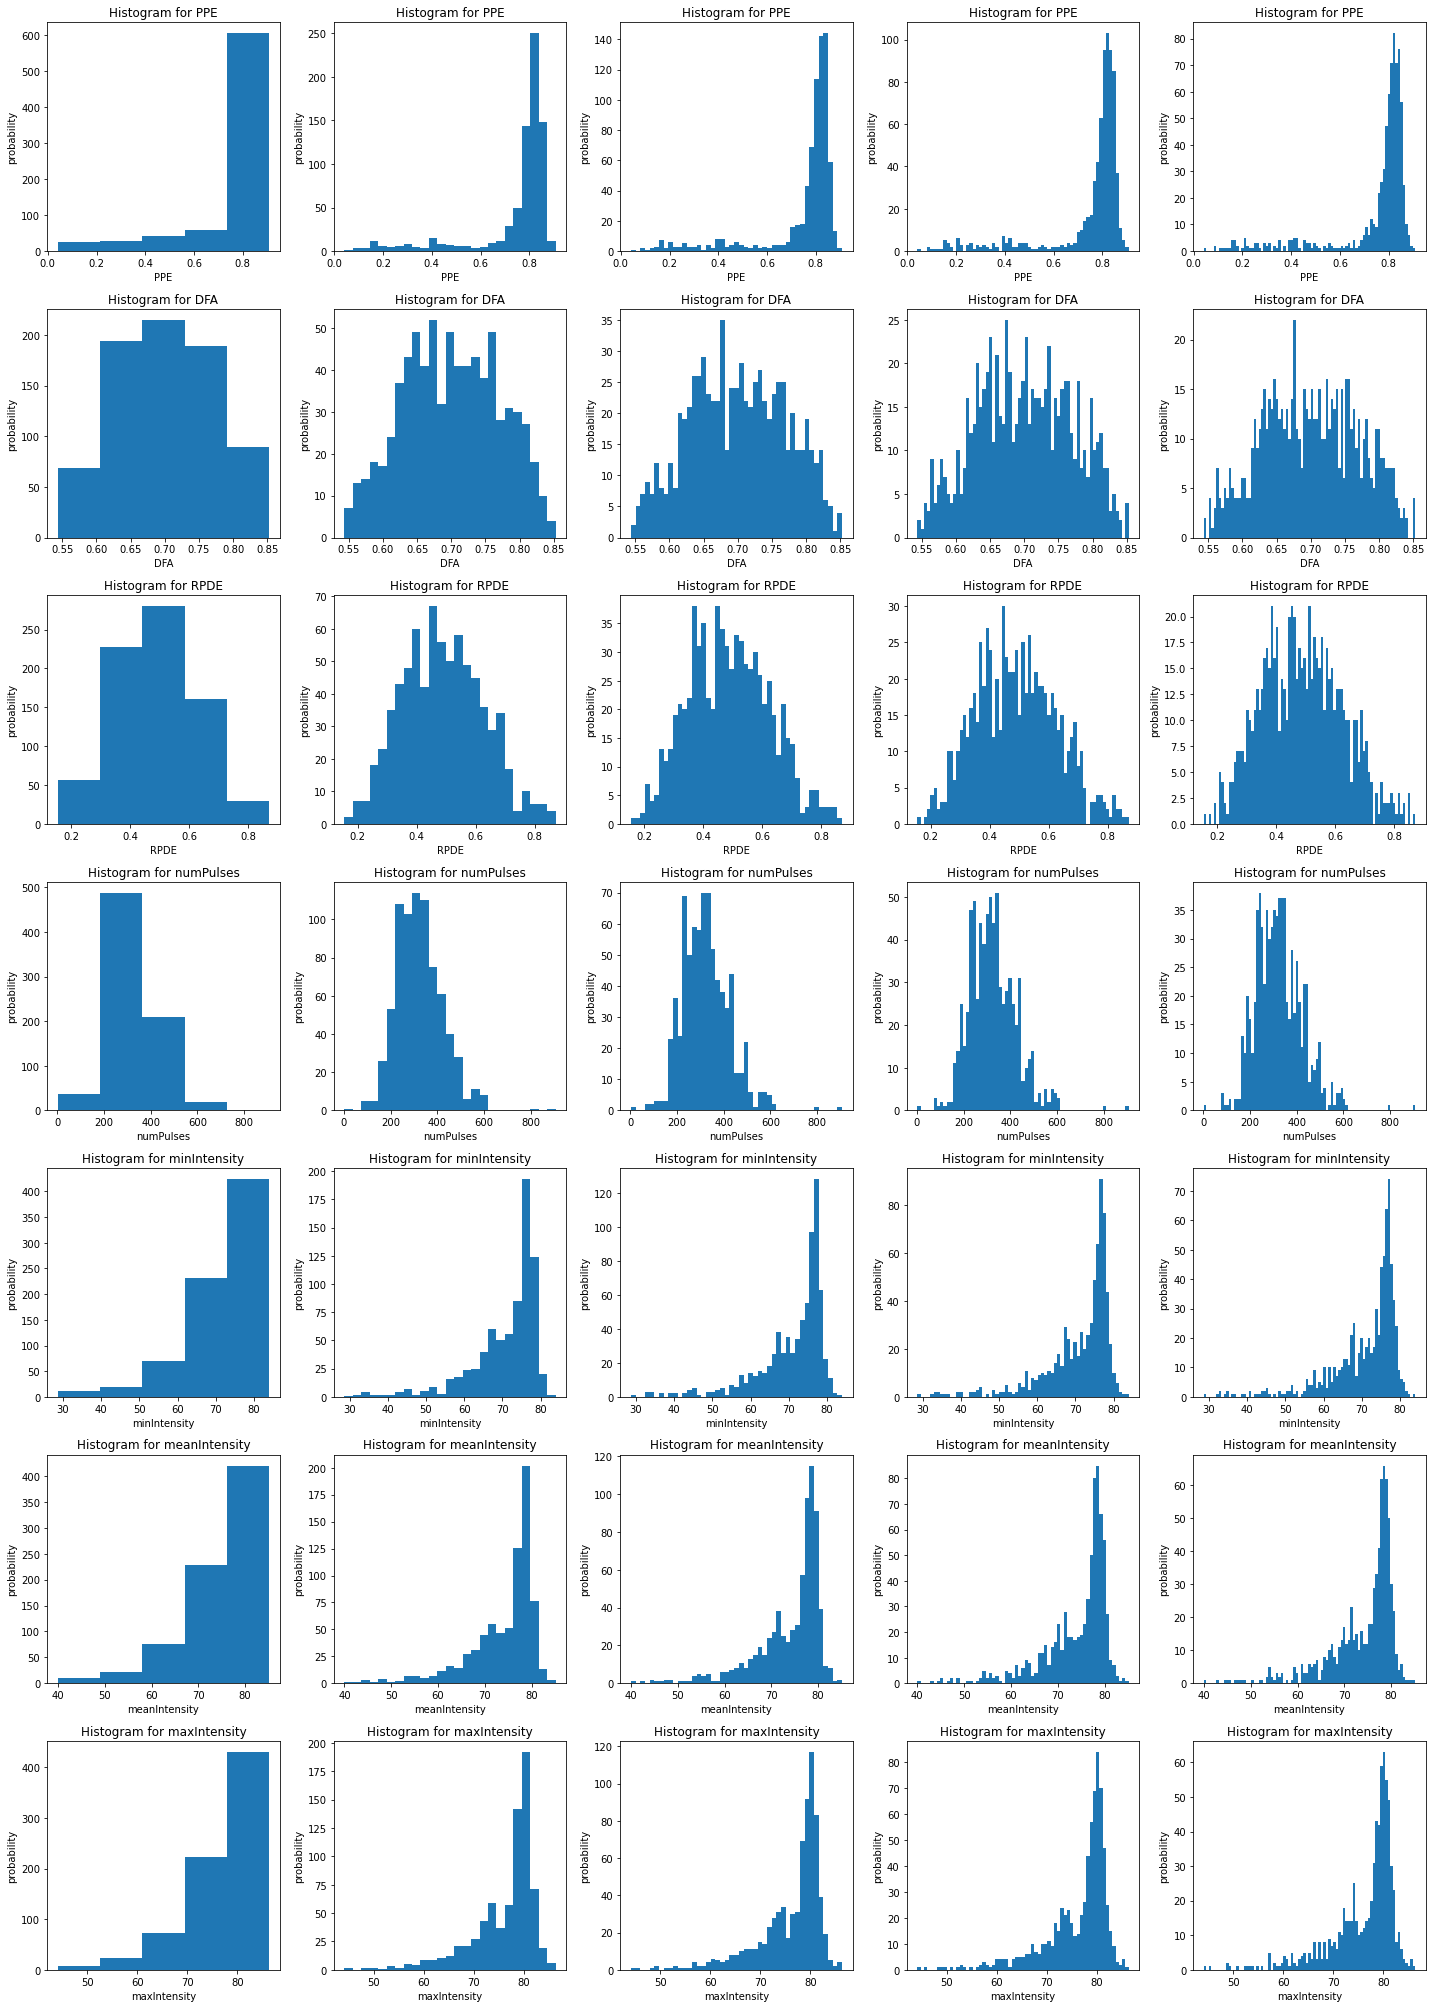

In [10]:
columns = ['PPE','DFA','RPDE','numPulses','minIntensity', 'meanIntensity', 'maxIntensity']
rows = len(columns)
cols = 5
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
bins = range(5, 100, 20)
for i in range(len(columns)):
    for j in range(len(bins)):
        axs[i, j].set_title('Histogram for %s'%columns[i])
        axs[i, j].set_xlabel(columns[i])
        axs[i, j].set_ylabel("probability")
        axs[i, j].hist(data[columns[i]].dropna().values, bins[j])
fig.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

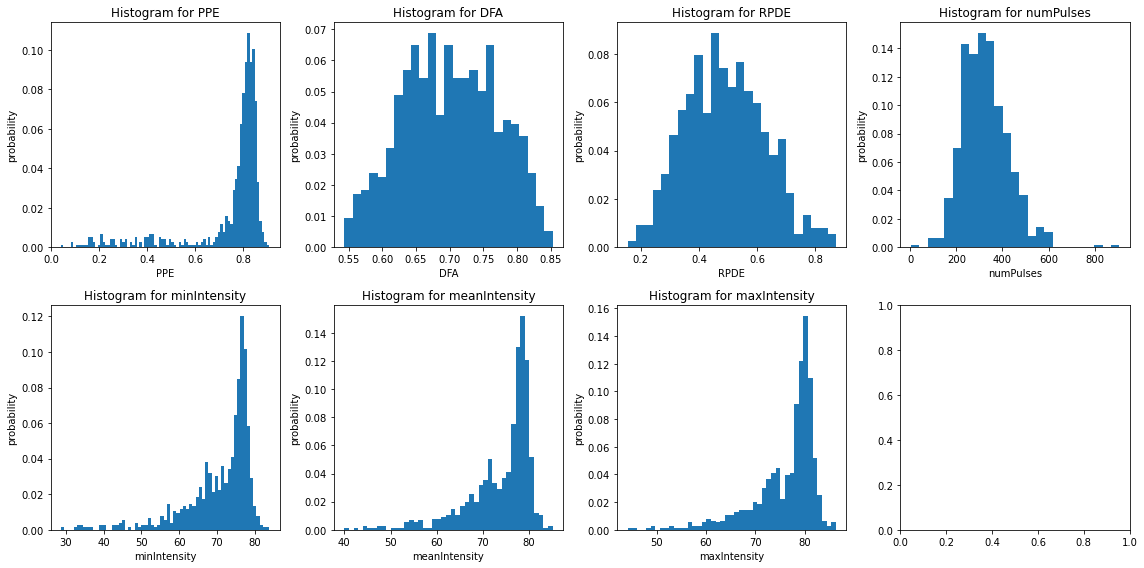

In [11]:
columns = ['PPE','DFA','RPDE','numPulses','minIntensity', 'meanIntensity', 'maxIntensity']
bins = [85, 25, 25, 25 ,65, 45, 45]
rows, cols = func.choose_grid(len(columns)-1)
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    axs[i, j].set_title('Histogram for %s'%columns[n])
    axs[i, j].set_xlabel(columns[n])
    axs[i, j].set_ylabel("probability")
    axs[i, j].hist(data[columns[n]].dropna().values, bins[n],weights=np.ones(len(data)) / len(data))
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

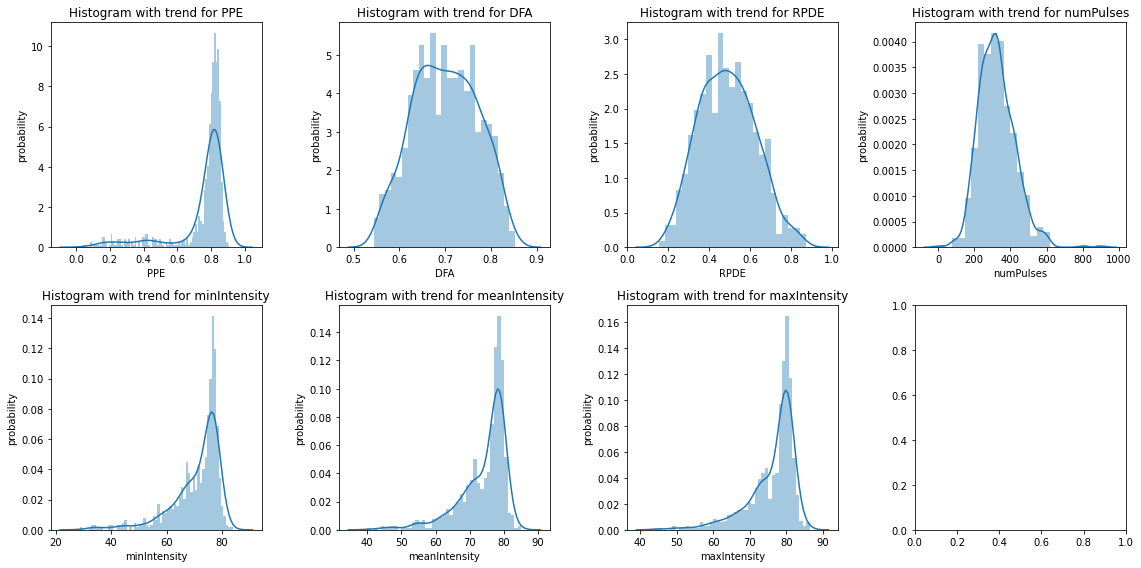

In [12]:
import seaborn as sns

columns = ['PPE','DFA','RPDE','numPulses','minIntensity', 'meanIntensity', 'maxIntensity']
bins = [85, 25, 25, 25 ,65, 45, 45]
rows, cols = func.choose_grid(len(columns)-1)
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
i, j = 0, 0
for n in range(len(columns)):
    axs[i, j].set_title('Histogram with trend for %s'%columns[n])
    axs[i, j].set_ylabel("probability")
    sns.distplot(data[columns[n]].dropna().values,bins=bins[n] ,norm_hist=True, ax=axs[i, j], axlabel=columns[n])
    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
fig.tight_layout()
plt.show()

#### Intensity 

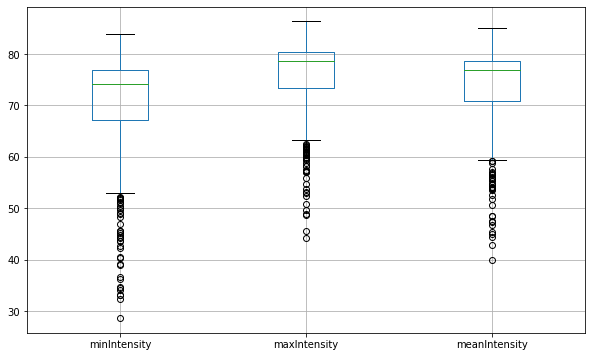

In [13]:
int_data = data[['minIntensity', 'maxIntensity', 'meanIntensity']]
int_data.boxplot(figsize=(10,6))
plt.show() 
                

#### Podemos concluir que as variáveis *Intensity possuem muitos outliers

# FIM